In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>1) Load the Diabetes Dataset into dataframe</b>

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes-1.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b>2) Describe the Dataset</b><br>

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b>3) Exploratory Pairplot</b>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


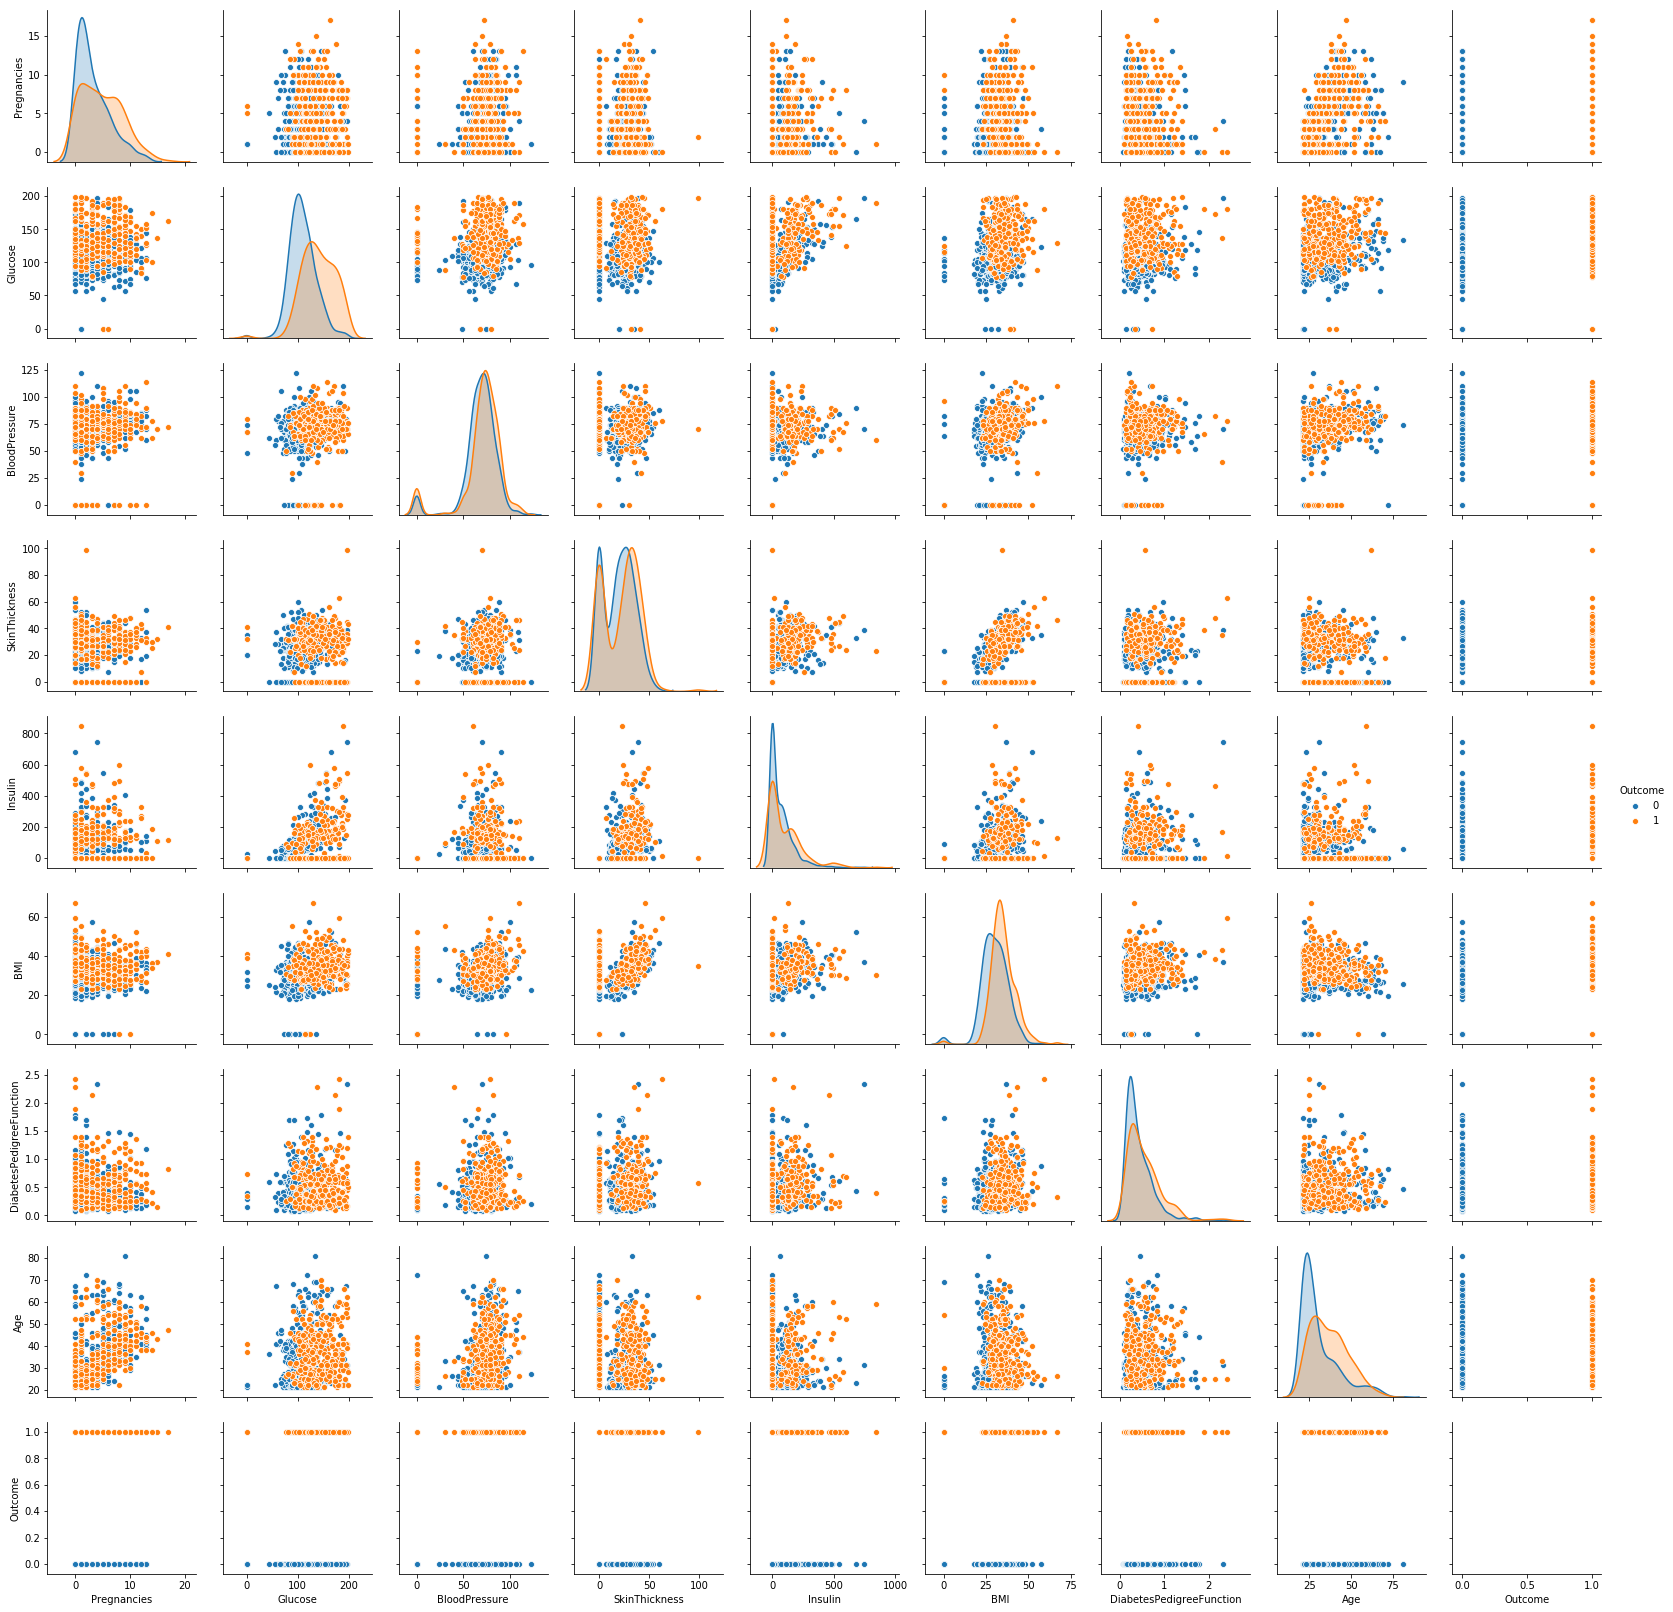

In [5]:
sns.pairplot(diabetes,hue='Outcome')

<b>4) From the above distribution high level observations:</b><br>
    a) Increasing levels of Glucose have high count of Diabetics<br>
    b) All Columns except Insulin with 0 values are error data and need to be imputed<br>
    c) On observation of Insulin Histogram many diabetic and non-diabetics have 0 insulin level. Also Based on categories of insulin levels there is a category <b><25</b>

In [6]:
diabetes_columns = list(diabetes.columns.values)
diabetes_columns.remove('Outcome')

<b>5) Zero Values in Columns</b>

In [7]:
print('Zero Values')
for i in range(0,len(diabetes_columns)):
    print(diabetes_columns[i],": ",len(diabetes[diabetes[diabetes_columns[i]]==0]))
    

Zero Values
Pregnancies :  111
Glucose :  5
BloodPressure :  35
SkinThickness :  227
Insulin :  374
BMI :  11
DiabetesPedigreeFunction :  0
Age :  0


<b>6 a) Imputing 0 values in all columns except Pregnancies, insulin as < 25 is a possible category for insulin level and ambiguous in nature</b>

In [8]:
print("Column \nMedian \t Mean")
for i in range(0,len(diabetes_columns)):
    if((diabetes_columns[i] != 'Insulin') & (diabetes_columns[i] != 'Pregnancies')):
        median = diabetes.loc[diabetes[diabetes_columns[i]]!=0,diabetes_columns[i]].median()
        mean = diabetes.loc[diabetes[diabetes_columns[i]]!=0,diabetes_columns[i]].mean()
        #mode = diabetes.loc[diabetes[diabetes_columns[i]]!=0,diabetes_columns[i]].mode()
        print(diabetes_columns[i]," \n ",median,"\t",mean)
        

Column 
Median 	 Mean
Glucose  
  117.0 	 121.6867627785059
BloodPressure  
  72.0 	 72.40518417462484
SkinThickness  
  29.0 	 29.153419593345657
BMI  
  32.3 	 32.45746367239099
DiabetesPedigreeFunction  
  0.3725 	 0.4718763020833327
Age  
  29.0 	 33.240885416666664


<b>6 b)Replacing with median</b>

In [9]:
for i in range(0,len(diabetes_columns)):
    if((diabetes_columns[i] != 'Insulin') & (diabetes_columns[i] != 'Pregnancies')):
        median = diabetes.loc[diabetes[diabetes_columns[i]]!=0,diabetes_columns[i]].median()
        diabetes.loc[diabetes[diabetes_columns[i]]==0,diabetes_columns[i]] = median

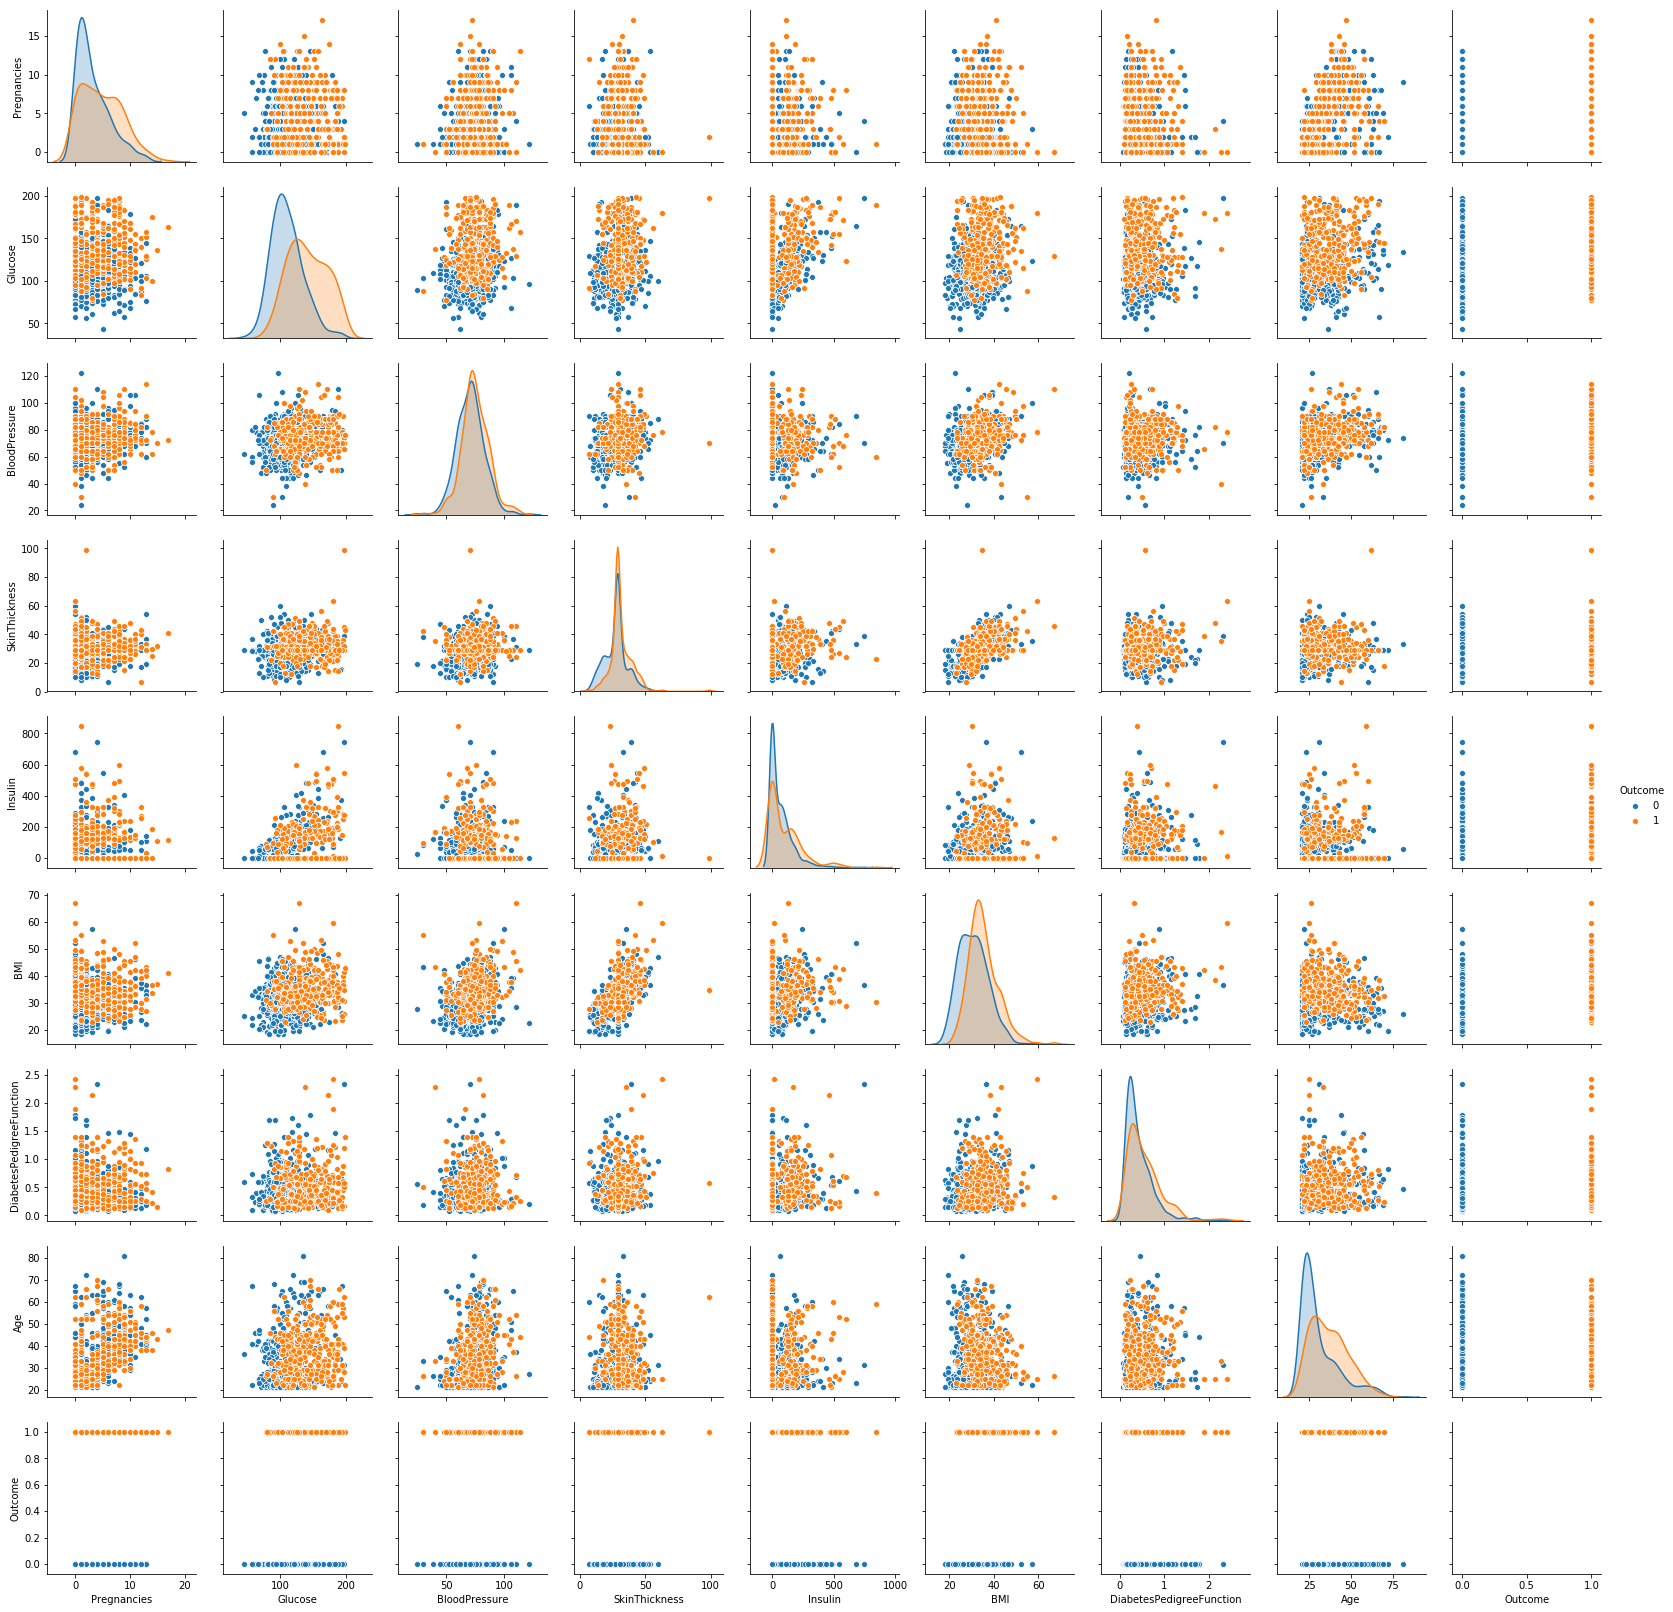

In [10]:
sns.pairplot(diabetes,hue='Outcome')

<b>7) Saving Dataframe</b>

In [11]:
diabetes.to_csv('Diabetes_Imputed.csv',index=False)

<b>8) Analyzing plots distribution</b>

<b>8 a) Swarm Plot</b>

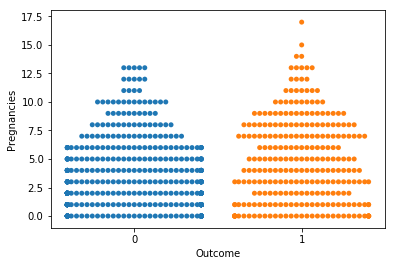

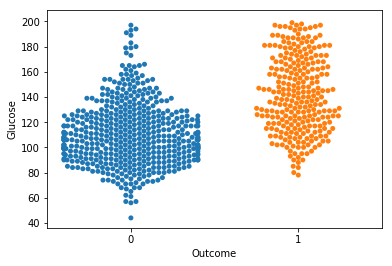

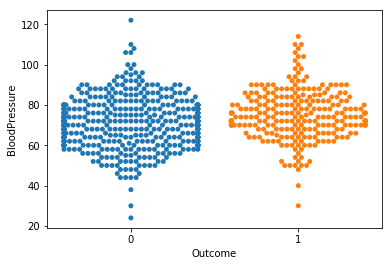

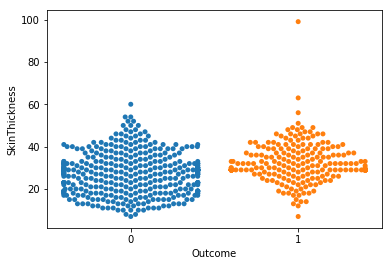

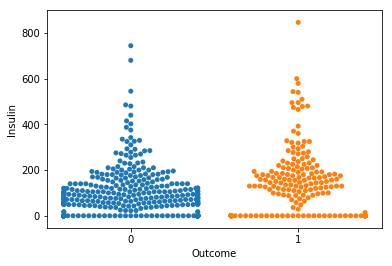

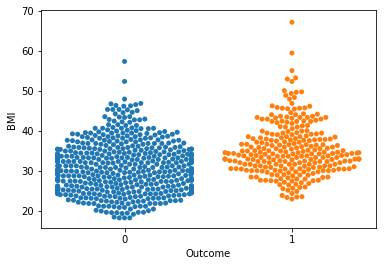

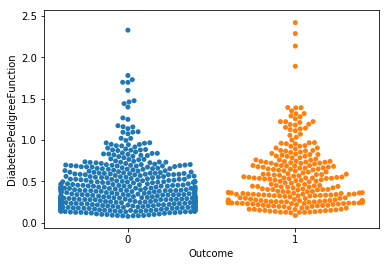

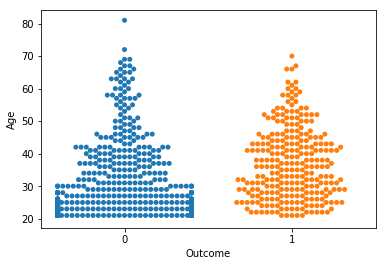

In [12]:
for i in range(0,len(diabetes_columns)):
    sns.swarmplot(x=diabetes['Outcome'],y=diabetes[diabetes_columns[i]])
    plt.show()

<b>8 b) Box Plot</b>

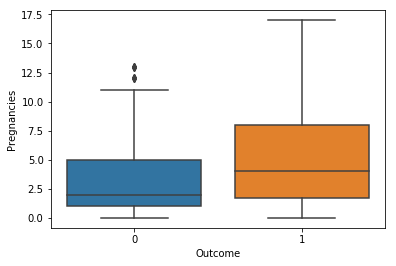

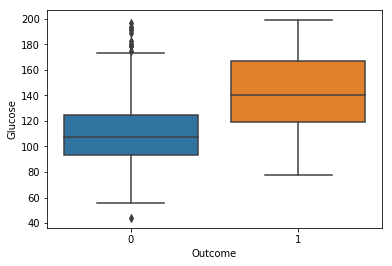

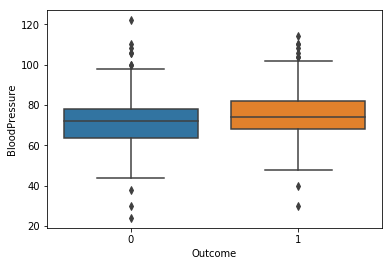

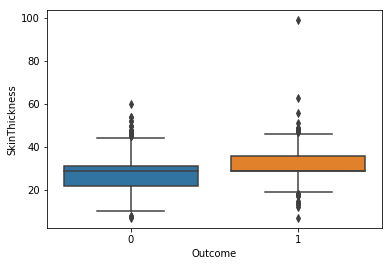

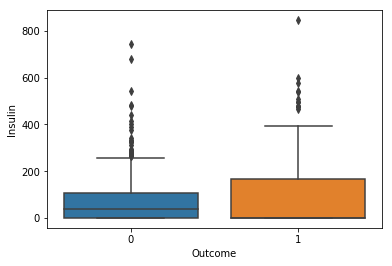

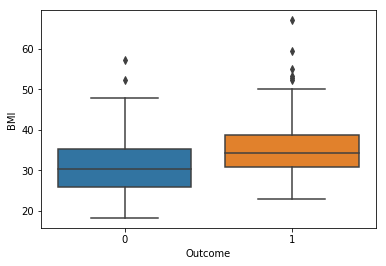

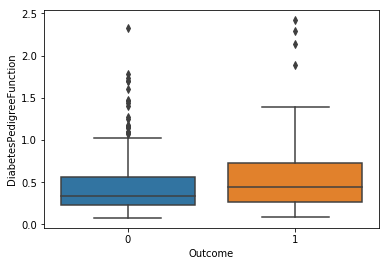

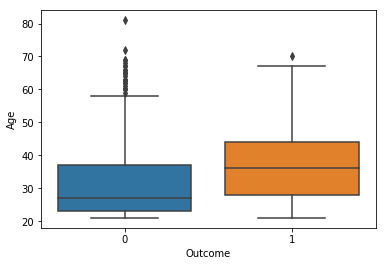

In [13]:
for i in range(0,len(diabetes_columns)):
    sns.boxplot(x=diabetes['Outcome'],y=diabetes[diabetes_columns[i]])
    plt.show()

<b>9 a) Find Correlation</b>

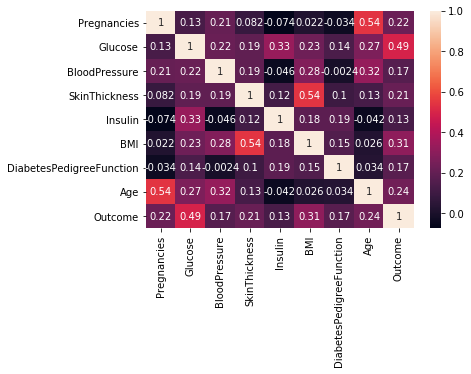

In [14]:
corr = diabetes.corr()
sns.heatmap(corr,annot=True)

<b>9 b) Highest Correlation to Outcome  </b>

In [15]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.130548
Name: Outcome, dtype: float64

<b>10) Feature Selection and Scaling</b>

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features = diabetes[['Glucose','BMI']]
Outcome = diabetes[['Outcome']]
#features_scaled = features                     # Values without scaling
features_scaled = sc.fit_transform(features)    # Scale the values
#features_scaled

<b>11) Create Test Train Split</b>

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, Outcome, test_size = 0.2, random_state = 100)

<b>Define Confusion Matrix Function</b>

In [18]:
def ConfusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tn = cm[1,1]
    print("True positives ",tp)
    print("False positives ",fp)
    print("False Negatives ",fn)
    print("True Negatives ",tn)
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

<b>12 a) Logistic Regression Model with standard feature scaling</b>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision, recall = ConfusionMatrix(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

True positives  86
False positives  15
False Negatives  28
True Negatives  25
Precision: 0.851485 Recall 0.754386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<b>12 b)Random Foret Classifier with feature scaling</b>

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

precision, recall = ConfusionMatrix(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


True positives  78
False positives  23
False Negatives  26
True Negatives  27
Precision: 0.772277 Recall 0.750000


<b>No feature scaling</b>

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features = diabetes[['Glucose','BMI']]
Outcome = diabetes[['Outcome']]
features_scaled = features                     # Values without scaling
#features_scaled = sc.fit_transform(features)    # Scale the values
#features_scaled

<b>13 a) Logistic Regression Model without feature scaling</b>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision, recall = ConfusionMatrix(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

True positives  86
False positives  15
False Negatives  28
True Negatives  25
Precision: 0.851485 Recall 0.754386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<b>13 b)Random Foret Classifier with feature scaling</b>

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

precision, recall = ConfusionMatrix(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


True positives  81
False positives  20
False Negatives  25
True Negatives  28
Precision: 0.801980 Recall 0.764151
